In [3]:
import sklearn

import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import pandas as pd
import os

current_dir = os.getcwd()
dataset = "dataset"
dataset_path = os.path.join(current_dir, dataset)
csv_file_path = f"{dataset_path}/water_potability.csv"

In [4]:
df = pd.read_csv(csv_file_path)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
df.shape

(3276, 10)

In [6]:
print(df['Potability'].unique())
print(df['Potability'].value_counts().unique())

[0 1]
[1998 1278]


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
# df.hist(bins=50, figsize=(10,10))
# plt.show()

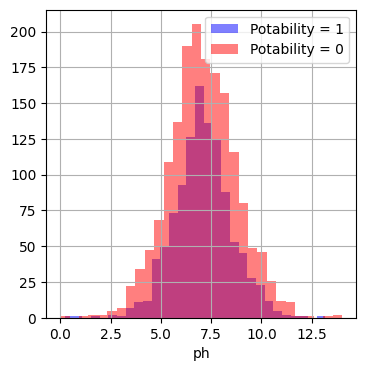

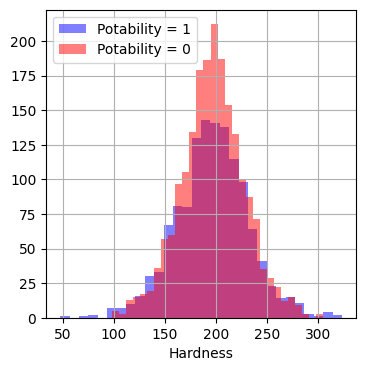

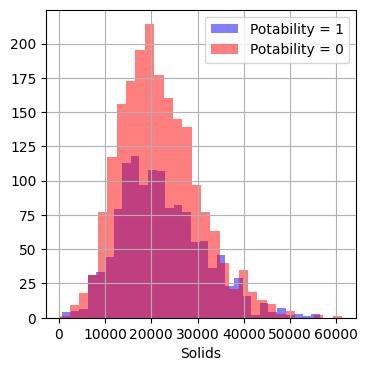

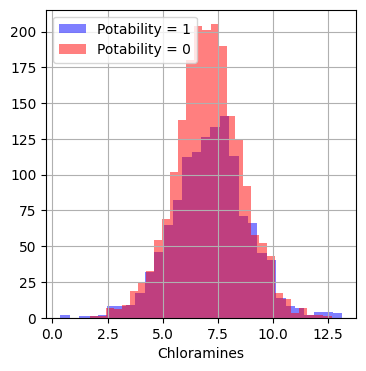

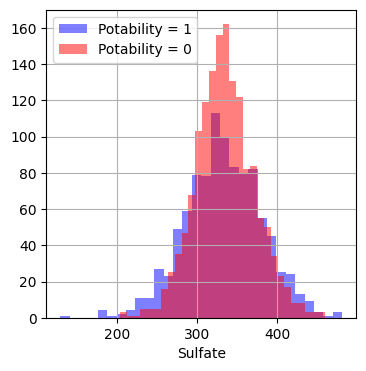

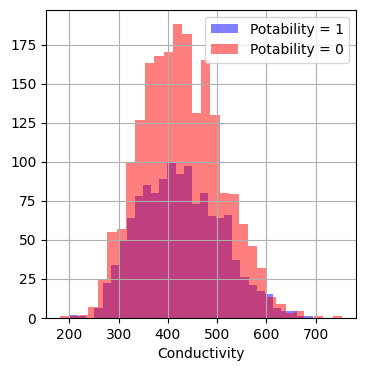

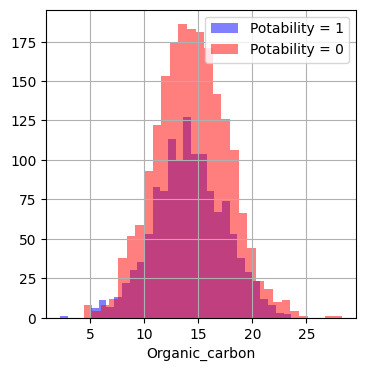

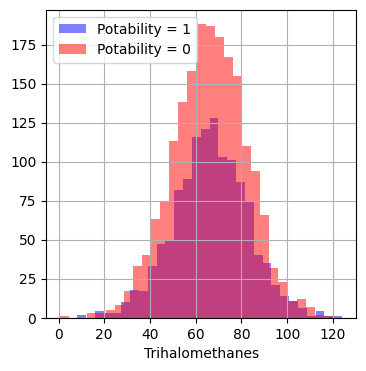

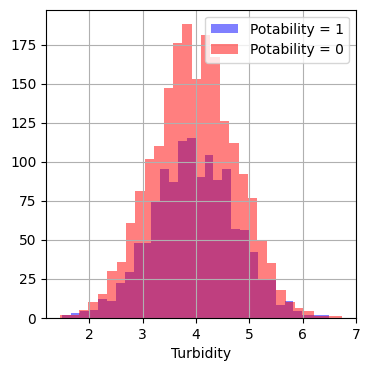

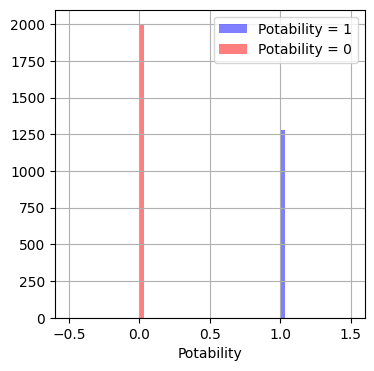

In [10]:
for column in df.columns:
    plt.figure(figsize=(4,4))
    
    df[df['Potability'] == 1][column].hist(alpha=0.5, color='blue', bins=30, label='Potability = 1')
    df[df['Potability'] == 0][column].hist(alpha=0.5, color='red', bins=30, label='Potability = 0')
    
    plt.legend()
    plt.xlabel(column)
    plt.show()

In [11]:
corr_matrix = df.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


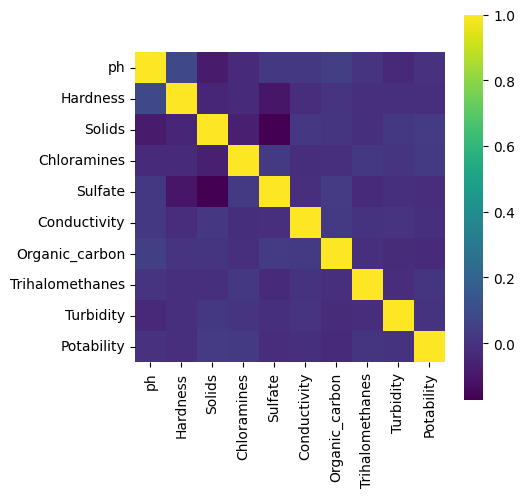

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(data = corr_matrix, square = True , cmap ="viridis")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df.iloc[:,:9]
y = df[['Potability']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform, randint
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Extra Trees':ExtraTreesClassifier(),
}

param_distributions = {
    'Random Forest': {
        'n_estimators': randint(100, 1000),
        'max_depth': randint(1, 100),
        'min_samples_split': randint(2, 200),
        'min_samples_leaf': randint(1, 100)
    },
    'SVM': {
        'C': uniform(0.1, 10),
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'sigmoid']
    },
    "KNN": {
        "n_neighbors": randint(1, 10),
        "weights": ["uniform", "distance"],
        "metric": ['euclidean', 'manhattan']
    },
    'Extra Trees':{
        'n_estimators':randint(1,1000),
        'criterion':['gini','entropy'],
        'max_depth': randint(1, 100),
        'min_samples_split': randint(2, 200),
        'min_samples_leaf': randint(1, 100) 
    },
}

best_estimator_dict = {classifier_name: [] for classifier_name in classifiers}
# scoring_metrics_classification = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
# Perform randomized search CV for each classifier
for classifier_name, classifier in classifiers.items():
    param_dist = param_distributions[classifier_name]
    # for scoring_metric in scoring_metrics_classification:
    random_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_dist,
    n_iter=10,  
    cv=5,  
    scoring='accuracy',  
    n_jobs=-1  
    )
    
    
    random_search.fit(X_train, y_train.values.ravel())
    
    best_estimator_dict[classifier_name].append(random_search.best_estimator_)
    
    print(f"Best hyperparameters for {classifier_name}:")
    print(random_search.best_params_)
    print(f"Scoring metric: accuracy:")
    print(random_search.best_score_)
    print("------------------------------------------------------")

Best hyperparameters for Random Forest:
{'max_depth': 68, 'min_samples_leaf': 29, 'min_samples_split': 21, 'n_estimators': 594}
Scoring metric: accuracy:
0.649618320610687
------------------------------------------------------
Best hyperparameters for SVM:
{'C': 3.170870250291977, 'gamma': 'scale', 'kernel': 'rbf'}
Scoring metric: accuracy:
0.6755725190839696
------------------------------------------------------
Best hyperparameters for KNN:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Scoring metric: accuracy:
0.6396946564885496
------------------------------------------------------
Best hyperparameters for Extra Trees:
{'criterion': 'gini', 'max_depth': 73, 'min_samples_leaf': 6, 'min_samples_split': 98, 'n_estimators': 875}
Scoring metric: accuracy:
0.6267175572519084
------------------------------------------------------


In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import ExtraTreesClassifier

svm_clf = best_estimator_dict['SVM'][0].set_params(class_weight=None,random_state=42)

rnd_clf = best_estimator_dict['Random Forest'][0].set_params(random_state=42)

etr_clf = best_estimator_dict['Extra Trees'][0].set_params(random_state=42)

bagging_clf = BaggingClassifier(
    estimator=svm_clf, 
    n_estimators=200,max_samples=500,bootstrap=False,n_jobs=-1,random_state=42)

bagging_clf.fit(X_train, y_train.values.ravel())


bag_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test,bag_pred)
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.6829268292682927


In [25]:
svm_clf

SVC(C=3.170870250291977, random_state=42)

In [27]:
from sklearn.ensemble import StackingClassifier


stacking_clf = StackingClassifier(
    estimators=[('bag', bagging_clf),('rf',rnd_clf),('etr',etr_clf)],
    final_estimator=svm_clf
    )


stacking_clf.fit(X_train, y_train.values.ravel())

stack_pred = stacking_clf.predict(X_test)

accuracy = accuracy_score(y_test,stack_pred)
print("Stacking Accuracy:", accuracy)

Stacking Accuracy: 0.6676829268292683


In [ ]:
from sklearn.model_selection import cross_val_predict,classification_report

svm_pred = cross_val_predict(svm_clf, X_train, y_train.values.ravel(), cv=3,method='decision_function')

svm_report=classification_report(y_test,stack_pred)


array([-0.77022957, -1.48060507, -0.7668321 , ..., -1.13299274,
       -1.14484915, -0.66279655])

[[387  25]
 [174  70]]


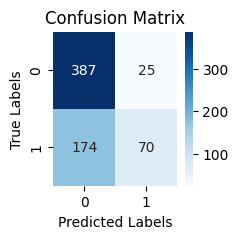

In [71]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test,stack_pred)

print(cm_svm)
plt.figure(figsize=(2,2))
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

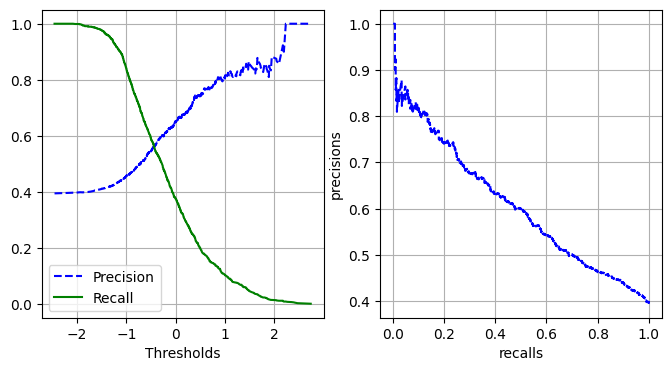

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls ,thresholds = precision_recall_curve(y_train.values.ravel(),svm_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(thresholds,precisions[:-1],"b--",label = "Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label = "Recall")
    plt.xlabel('Thresholds')
    plt.legend(loc='lower left')
    plt.grid(True)
    # plt.axis([-5, 5, 0, 1])    
    
    plt.subplot(1,2,2)
    plt.plot(recalls,precisions,"b--")
    plt.xlabel('recalls')
    plt.ylabel('precisions')
    plt.grid(True)
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
def apply_threshold(y_pred_method, threshold):
    return (y_pred_method >= threshold).astype(int)

threshold = 0.5
y_pred_0_8 = apply_threshold(svm_pred, threshold)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, thresholds = roc_curve(y_train, svm_pred)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_0_8)
# def plot_roc_curve(fpr, tpr, label=None):
#     plt.plot(fpr, tpr, linewidth=2, label=label)
#     plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
#     [...] # Add axis labels and grid
# plot_roc_curve(fpr, tpr)
# plt.show()



print(roc_auc_score(y_train,svm_pred))
print(roc_auc_score(y_train,y_pred_0_8))


# y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
# fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

# plt.plot(fpr, tpr, "b:", label="SGD")
# plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
# plt.legend(loc="lower right")
# plt.show()

# roc_auc_score(y_train_5, y_scores_forest)

0.6871257448515907
0.5586197896975713
